In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv('./fods_1.csv')
m = len(dataset)
dataset.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [3]:
dataset.shape

(546, 3)

In [4]:
f = np.ones((len(dataset),1))
for d in range (1,10):
    for j in range (d+1):
        k = d - j
        f = np.c_[f,(dataset['MLOGP']**k)*(dataset['RDCHI']**j)]
f.shape

(546, 55)

In [5]:
x = dataset.iloc[:,:2]
y = dataset.iloc[:,[2]]
y=y.to_numpy()

# Error lists

J_train = []
J_test = []
optimal_params =[]

### Randomisation

In [6]:
random.seed(30)
rangelist = list(range(m)) # 0 to 545
size = int(len(rangelist) * 0.8)
frac = random.sample(rangelist,size)
rem = [i for i in rangelist if i not in frac]

In [7]:
p = len(frac)
q = len(rem)
p,q

(436, 110)

## Polynomial Regression

## Unregularised Implementation

###  Batch Gradient Descent

In [8]:
def Cost(data,params):
    sz =len(data)
    
    x = data[:,0:-1]
    y = data[:,[-1]]
    
    yhat = np.dot(x,params)
    cost = np.sum( (yhat - y) **2) / (2*sz)
    
    return cost

In [9]:
def norm_training(data):
    x = data[:,1:-1]
    xs = np.std(x,axis=0)
    
    xm = np.mean(x,axis=0)
    
    norm_x=np.divide((x-xm),xs)
    
    res = np.c_[data[:,0],norm_x,data[:,-1]]
    return res,xm,xs

In [10]:
def norm_testing(data,xm,xs):
    x = data[:,1:-1]
    x_norm = np.divide((x - xm) ,xs)
    res = np.c_[data[:,0],x_norm,data[:,-1]]
    return res 

In [11]:
def compute(data,params):
    x = data[:,0:-1]
    yhat = np.dot(x,params)
    return yhat

In [12]:
def grad_desc(data,params,lr = 0.01,epochs = 100000):
    mm = len(data)
    x=data[:,0:-1]
    y=data[:,[-1]]
    J_list = []
    
    for itr in range(0,epochs):
        yhat = np.dot(x,params)
        grad = np.dot(x.T ,( yhat - y ) )
        params = params - (lr/mm)* grad
        J_list.append(Cost(data,params))
        
    J_list = np.array(J_list)
    return params,J_list

## Main Code

In [13]:
for d in range (0,10):
    X = np.ones((m,1))
    
    if d>=1:
        cnt = int(((d+1)*(d+2))/2)
        X = np.c_[X,f[:,1:cnt]]
        
        
    data = np.c_[X,y]
    
    train_data = data[frac,:]
    test_data = data[rem,:]
    
    params = np.zeros((X.shape[1],1))
    
    
    if d >= 1:
        train_data,train_mean,train_std = norm_training(train_data)
    
    params,J_list = grad_desc(train_data,params,0.01,100000)
    optimal_params.append(params)
    ls = J_list.shape[0]
    J_train.append(J_list[ls-1])
    
    
    if d>= 1:
        test_data = norm_testing(test_data,train_mean,train_std)
        
    
    yhat = compute(test_data,params)
    temp = Cost (test_data,params)
    J_test.append(temp)

In [14]:
J_train

[1.4649504791263361,
 0.9678961748459801,
 0.9272631994073753,
 0.9179743474390906,
 0.9133393011133255,
 0.90617088254038,
 0.899567262886819,
 0.8952210620384753,
 0.8904216952407279,
 0.886654360269708]

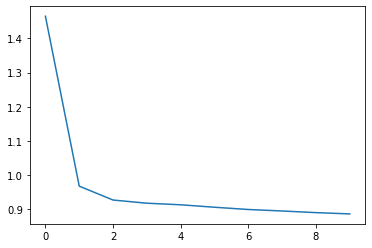

In [15]:
pt1 = np.array(np.arange(0,10,1))
plt.plot(pt1,J_train)

In [16]:
J_test

[1.0646719734174444,
 0.7095934966980185,
 0.699958595579163,
 0.7023457510781944,
 0.7016313624637981,
 0.7051437234301882,
 0.7102817763661912,
 0.7148975541992687,
 0.7169792646946711,
 0.71750005253167]

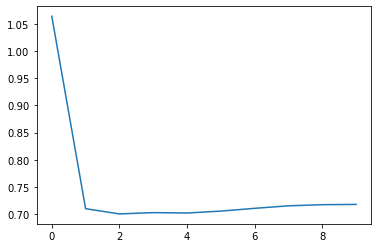

In [17]:
pt2 = np.array(np.arange(0,10,1))
plt.plot(pt2,J_test)

In [18]:
temp = np.zeros((10,1))
temp = np.c_[temp,J_train,J_test]
temp[0][0]=0

temp = temp[:,1:3]

df = pd.DataFrame(temp)
df.index.name='degree'
df.rename(columns={0:'Training Error',1:'Testing Error'},inplace=True)

In [19]:
df

,Training Error,Testing Error
degree,,
0,1.464950,1.064672
1,0.967896,0.709593
2,0.927263,0.699959
3,0.917974,0.702346
4,0.913339,0.701631
5,0.906171,0.705144
6,0.899567,0.710282
7,0.895221,0.714898
8,0.890422,0.716979


In [20]:
optimal_params # optimal params for various degrees

[array([[4.68588073]]),
 array([[4.68588073],
        [0.76738836],
        [0.44269678]]),
 array([[ 4.68588073],
        [ 0.67239795],
        [ 1.61105388],
        [ 0.18941485],
        [-0.14981709],
        [-1.17684125]]),
 array([[ 4.68588073],
        [ 0.03321918],
        [ 1.46595431],
        [ 0.82521587],
        [ 0.68942205],
        [-1.09689528],
        [ 0.01619395],
        [-0.63060238],
        [-0.2846486 ],
        [ 0.06851619]]),
 array([[ 4.68588073],
        [ 0.3500374 ],
        [ 1.75430634],
        [ 0.0815501 ],
        [-0.21806029],
        [-1.1471077 ],
        [ 0.5895109 ],
        [ 0.27905636],
        [ 0.7460722 ],
        [-0.95202925],
        [ 0.02561174],
        [-0.63479348],
        [-0.21740243],
        [-0.33847831],
        [ 0.77340305]]),
 array([[ 4.68588073],
        [ 0.67141985],
        [ 1.71314479],
        [ 0.12085836],
        [-0.77163409],
        [-0.90244395],
        [-0.06709778],
        [-0.11696974],
     

# Surface Plots


In [21]:
x_surf,y_surf = np.meshgrid(np.linspace(-50, 50, 1000), np.linspace(-50, 50, 1000))
x_f = (pd.DataFrame({'MLOGP':x_surf.ravel(),'RDCHI':y_surf.ravel()})).to_numpy()

sz = len(x_f)

plot_features = np.ones((sz,1))
plot_features.shape

(1000000, 1)

In [22]:
for i in range(1,10):
    for j in range(0,i+1):
        
        k = i - j
        plot_features = np.c_[plot_features,(x_f[:,0] ** k ) * (x_f[:,1]**j)]

plot_features.shape

(1000000, 55)

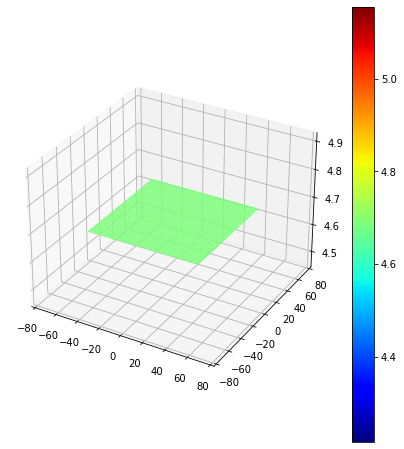

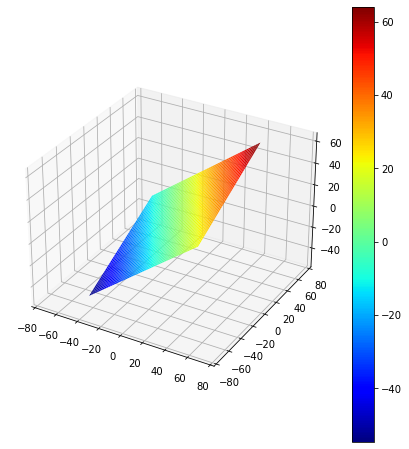

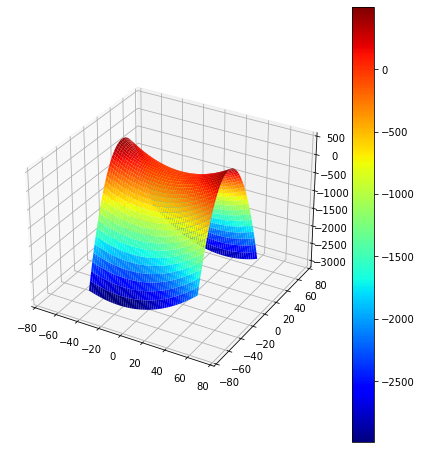

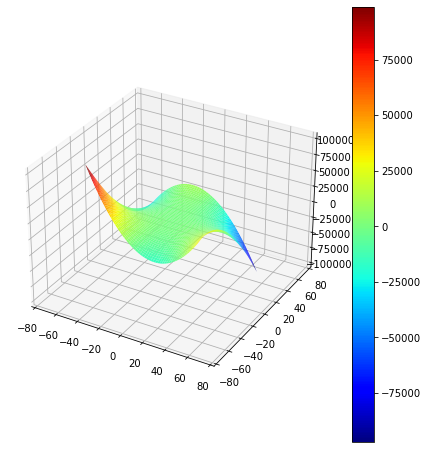

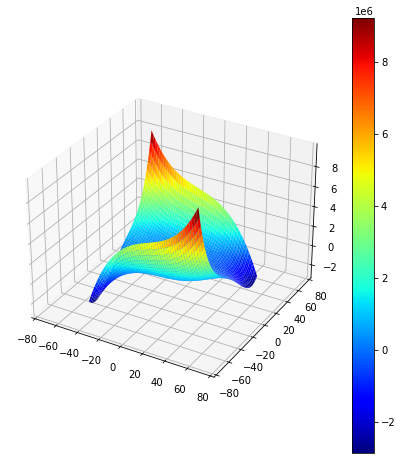

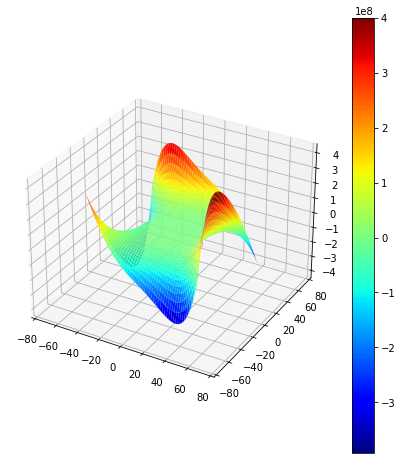

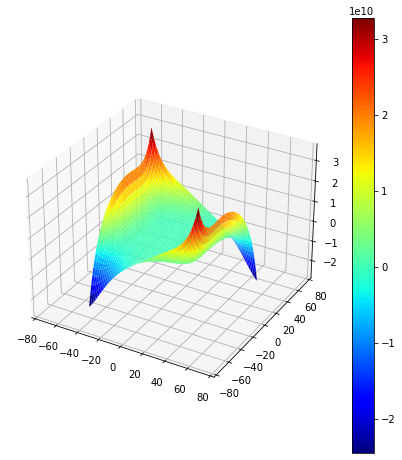

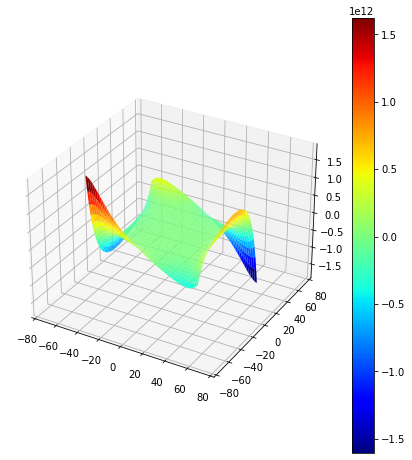

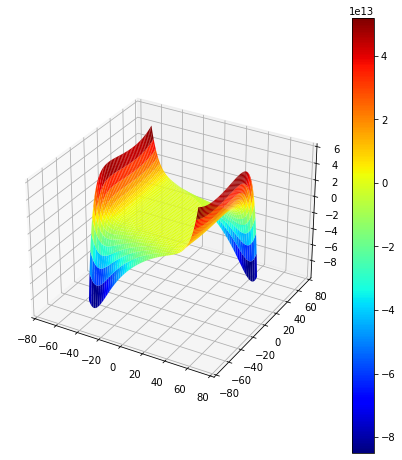

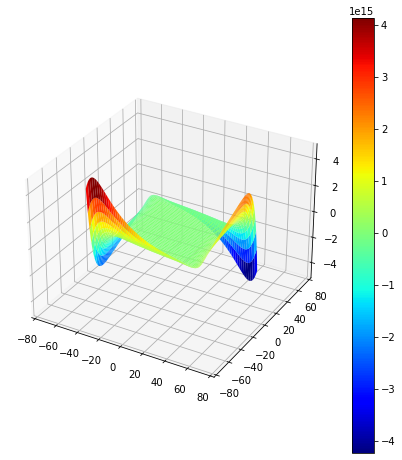

In [23]:
for i in range(0,10):
    x_plot = np.ones((len(x_f), 1))
    if i >= 1:
        cnt = int((i+1)*(i+2)/2)
        x_plot = np.c_[x_plot, plot_features[:,1:cnt]]
            
    data = np.c_[x_plot, np.ones((len(x_plot), 1))]
    
    y_pred_plot = compute(data, optimal_params[i])
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(x_surf, y_surf, y_pred_plot.reshape(x_surf.shape), cmap=cm.jet)

    ax1.set_xlim((-80, 80))
    ax1.set_ylim((-80, 80))
    
    fig.colorbar(surf, ax=ax1)
    plt.show() 

## Stochastic gradient descent

In [24]:
def grad_desc_stoc(data,params,lr=0.01,epochs=100000):
    # data is m x d+1 dimension with required x and y values
    sz = len(data)
    x=data[:,0:-1]
    y=data[:,[-1]]
    J_list = []
    
    templist = np.array([])
    for itr in range(0,epochs):
        idx =np.random.randint(0,sz,1)[0]
        x1 = x[idx].reshape(-1,1)
        x2 = x[idx].reshape(1,-1)
        grad = (x1) * (np.dot(x2,params)[0][0] - y[idx][0])
        
        params = params - (lr/sz)* grad
        J_list.append(Cost(data,params) )
    J_list = np.array(J_list)
        
   
    return params,J_list,templist
    

In [25]:
J_train_stoc = []
J_test_stoc = []

## Main Code

In [26]:

for d in range (0,10):
    X = np.ones((m,1))
    if d >= 1:
        cnt = int(((d+1)*(d+2))/2)
        X = np.c_[X,f[:,1:cnt]]
    data = np.c_[X,y]
    
    train_data = data[frac,:]
    test_data = data[rem,:]
    
    params = np.zeros((X.shape[1],1))
    
    if d >= 1:
        train_data,train_mean,train_std = norm_training(train_data)
    
    params,J_list,templist = grad_desc_stoc(train_data,params,0.01,100000)
   
    optimal_params.append(params)
    sz = J_list.shape[0]
    J_train_stoc.append(J_list[sz-1])
    
    if d >= 1:
        test_data = norm_testing(test_data,train_mean,train_std)
        
    yhat = compute(test_data,params)
    temp = Cost (test_data,params)
    J_test_stoc.append(temp)

In [27]:
J_train_stoc

[1.5732179630999332,
 1.0795088998368716,
 1.0937799096498348,
 1.0864116026706467,
 1.0588097733848216,
 1.0484929915309815,
 1.0461431801223813,
 1.0449127370075735,
 1.0503930221055768,
 1.0448594755576548]

In [28]:
J_test_stoc

[1.109515049556055,
 0.755987801086654,
 0.7773150575137835,
 0.7719959120864364,
 0.7525728963693022,
 0.764540976744908,
 0.7732742211981544,
 0.7796843664247155,
 0.7879452002623423,
 0.7992252369605294]

In [29]:
temp1 = np.zeros((10,1))
temp1 = np.c_[temp1,J_train_stoc,J_test_stoc]
temp1[0][0]=0

temp1 = temp1[:,1:3]

df = pd.DataFrame(temp1)
df.index.name='degree'
df.rename(columns={0:'Training Error',1:'Testing Error'},inplace=True)

In [30]:
df

,Training Error,Testing Error
degree,,
0,1.573218,1.109515
1,1.079509,0.755988
2,1.093780,0.777315
3,1.086412,0.771996
4,1.058810,0.752573
5,1.048493,0.764541
6,1.046143,0.773274
7,1.044913,0.779684
8,1.050393,0.787945


## Regularised implementation

In [31]:
ds = pd.read_csv('./fods_1.csv')
ds.head()
m= len(ds)

In [32]:
f = np.ones((m, 1))
f.shape

(546, 1)

In [33]:
dt = np.c_[f,ds['MLOGP'],ds['RDCHI'],ds.iloc[:,-1]]

In [34]:
dt.shape

(546, 4)

In [35]:
J_train_reg = []
J_test_reg = []

In [36]:
def compute(data,params):
    x = data[:,0:-1]
    yhat = np.dot(x,params)
    return yhat


In [37]:
def norm_training(data):
    x = data[:,1:-1]
    xm = np.mean(x,axis=0)
    xs = np.std(x,axis=0)
    norm_x=np.divide((x-xm),xs)
    
    norm = np.c_[data[:,0],norm_x,data[:,-1]]
    
    return norm,xm,xs

In [38]:
def norm_testing(data,xm,xs):
    x = data[:,1:-1]
    x_norm = np.divide((x - xm) ,xs)
    norm = np.c_[data[:,0],x_norm,data[:,-1]]
    return norm

In [39]:
def testCost(data, params):
    sz = len(data)
    X = data[:,0:-1]
    y = data[:,[-1]]
    
    loss = np.sum((np.dot(X, params) - y)**2) / (2 * sz)
    
    return loss

In [40]:
random.seed(30)
rangelist = list(range(m)) # 0 to 545
size = int(len(rangelist) * 0.8)
frac=random.sample(rangelist,size)
rem=[i for i in rangelist if i not in frac]

qlist=[0.5,1,2,4]
lamda=np.arange(0,200,5) # lambda values from 0,5,10,....200

In [41]:
def Cost_reg(data,params,q,l):
    sz = len(data)
    x = data[:,0:-1]
    y = data[:,[-1] ]
    J = (np.sum((np.dot(x,params) - y) ** 2) + (l * (np.sum(np.absolute(params[1:]) ** q)) )) / (2*sz)
    return J
    

In [42]:
def grad_desc_reg(data,params,q,l,lr=0.01,epochs=100000):
    sz = len(data)
    x = data[:,0:-1]
    y = data[:, [-1] ]
#     print(x.shape , " ",y.shape, " ",params.shape)
    J_temp = np.zeros(epochs)
    
    for itr in range (epochs):
        if q == 0.5:
            regval = np.ones(params.shape) 
            regval[0][0] = 0
            for j in range(1, params.shape[0]):
                if params[j][0] == 0:
                    regval[j][0] = 0
                elif params[j][0] > 0:
                    regval[j][0] = (1/4)*(np.absolute(params[j][0])**(-0.5))
                else:
                    regval[j][0] = (-1/4)*(np.absolute(params[j][0])**(-0.5)) 
            
            
            
        elif q == 1:
            regval = np.ones(params.shape)
            regval[0][0] = 0
            for k in range(1,params.shape[0]):
                if params[k][0] >= 0:
                    regval[k][0]=1
                else:
                    regval[k][0]=0
                    
                    
        elif q == 2:
             regval = np.concatenate((np.array([0]).reshape(1,1), params[1:]), axis = 0)
            
            
        elif q == 4:
            regval = 2 * ((np.concatenate((np.array([0]).reshape(1,1) , params[1:] ) ,axis = 0)) ** 3)
        
        
        
        
        
#         print(x.shape," ",y.shape,"\n")
        grad = np.dot(x.T,(np.dot(x,params) - y))
        
        params = params - (lr/sz) * (grad + regval*l)
        J_temp[itr] = Cost_reg(data,params,q,l)
        
    return params,J_temp 
    
    

## Main Code

In [43]:
for q in qlist:
    for l in lamda:
        train_data = dt[frac,:]
        test_data = dt[rem,:]
        train_data,train_mean,train_std = norm_training(train_data)
        n = dt[:,0:-1].shape[1]
        params = np.zeros((n,1))
        
        params,J_list = grad_desc_reg(train_data,params,q,l,0.01,100000)
        sz = J_list.shape[0]
        J_train_reg.append(J_list[sz-1])
        
        test_data = norm_testing(test_data,train_mean,train_std)
        
        yhat = compute(test_data,params)
        test_cost = testCost(test_data,params)
        J_test_reg.append(test_cost)

In [44]:
len(J_train_reg)


160

In [45]:
t1 = J_test_reg[0:40]
t2 = J_test_reg[40:80]
t3 = J_test_reg[80:120]
t4 = J_test_reg[120:160]

Text(0, 0.5, 'Testing Error')

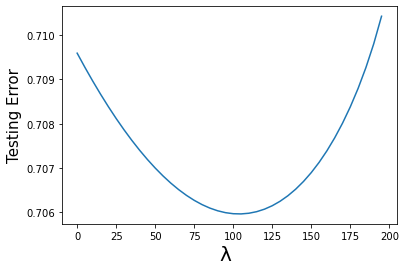

In [46]:
plt.plot(np.arange(0,200,5),t1) # optimal lambda = 110
plt.xlabel('λ ',fontsize=20)
plt.ylabel('Testing Error',fontsize=15)

Text(0, 0.5, 'Testing Error')

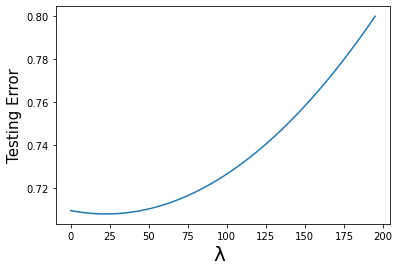

In [47]:
plt.plot(np.arange(0,200,5),t2) # optimal lambda = 25
plt.xlabel('λ ',fontsize=20)
plt.ylabel('Testing Error',fontsize=15)

Text(0, 0.5, 'Testing Error')

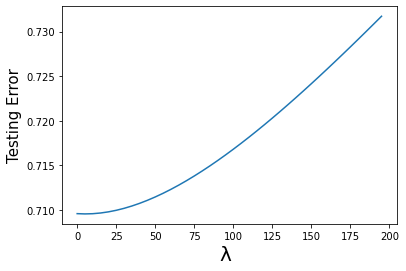

In [48]:
plt.plot(np.arange(0,200,5),t3) # optimal lambda = 5
plt.xlabel('λ ',fontsize=20)
plt.ylabel('Testing Error',fontsize=15)

Text(0, 0.5, 'Testing Error')

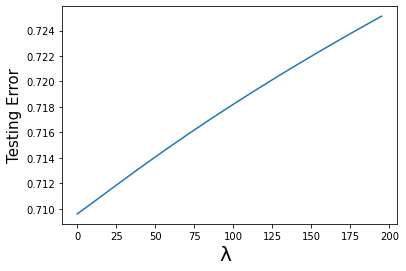

In [49]:
plt.plot(np.arange(0,200,5),t4) # optimal lambda = 0.01
plt.xlabel('λ ',fontsize=20)
plt.ylabel('Testing Error',fontsize=15)